### Importando librerías requeridas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

### Análisis Exploratorio

In [2]:
df = pd.read_csv("../data/info_01.csv")

In [3]:
df.dtypes

id       int64
id2      int64
v4     float64
v5     float64
v6     float64
dtype: object

In [4]:
df.describe()

,id,id2,v4,v5,v6
count,17286.000000,17286.000000,17286.000000,17286.000000,17286.000000
mean,4075.651047,4075.651047,606.032176,25.730504,0.003862
std,2347.052912,2347.052912,313.824105,5.527639,0.000851
min,1.000000,1.000000,412.800000,16.700000,0.002674
25%,2042.250000,2042.250000,439.000000,20.200000,0.003080
50%,4086.000000,4086.000000,453.500000,26.200000,0.003800
75%,6102.750000,6102.750000,637.500000,30.500000,0.004351
max,8143.000000,8143.000000,2028.500000,39.100000,0.006476


In [5]:
print(f"Número de regisros y columns: {len(df), len(df.columns)}")

Número de regisros y columns: (17286, 5)


In [6]:
df.head()

,id,id2,v4,v5,v6
0,1,1,721.2,27.3,0.004793
1,1,1,721.2,27.3,0.004793
2,2,2,714.0,27.3,0.004783
3,2,2,714.0,27.3,0.004783
4,3,3,713.5,27.2,0.004779


In [7]:
df.tail()

,id,id2,v4,v5,v6
17281,5411,5411,423.3,30.8,0.004235
17282,6547,6547,463.0,26.1,0.003606
17283,1806,1806,445.0,21.2,0.003104
17284,5606,5606,420.2,26.3,0.003830
17285,3689,3689,449.0,19.3,0.002729


## Búscando columnas y registros duplicados

In [8]:
sameRecords = df["id"] == df["id2"]

print(f"Número de registros iguales entre columna id y id2: {sameRecords.sum()}")
print(f"Número de registros en el archivo: {len(df)}")

Número de registros iguales entre columna id y id2: 17286
Número de registros en el archivo: 17286


In [9]:
df.drop("id2", axis=1, inplace=True)

In [10]:
df = df.T.drop_duplicates().T

In [11]:
print(f"Número de registros duplicados: {df.duplicated().sum()}")

Número de registros duplicados: 9143


In [12]:
df.drop_duplicates(inplace=True)

## Identificación de valores Nulos

In [13]:
df.isnull().sum()

id    0
v4    0
v5    0
v6    0
dtype: int64

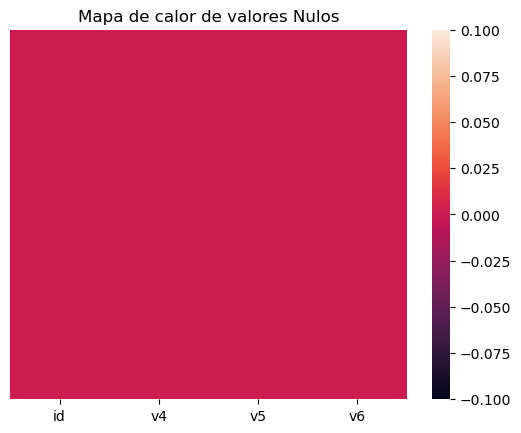

In [14]:
sns.heatmap(df.isnull(), yticklabels=False)
plt.title("Mapa de calor de valores Nulos")
plt.show()

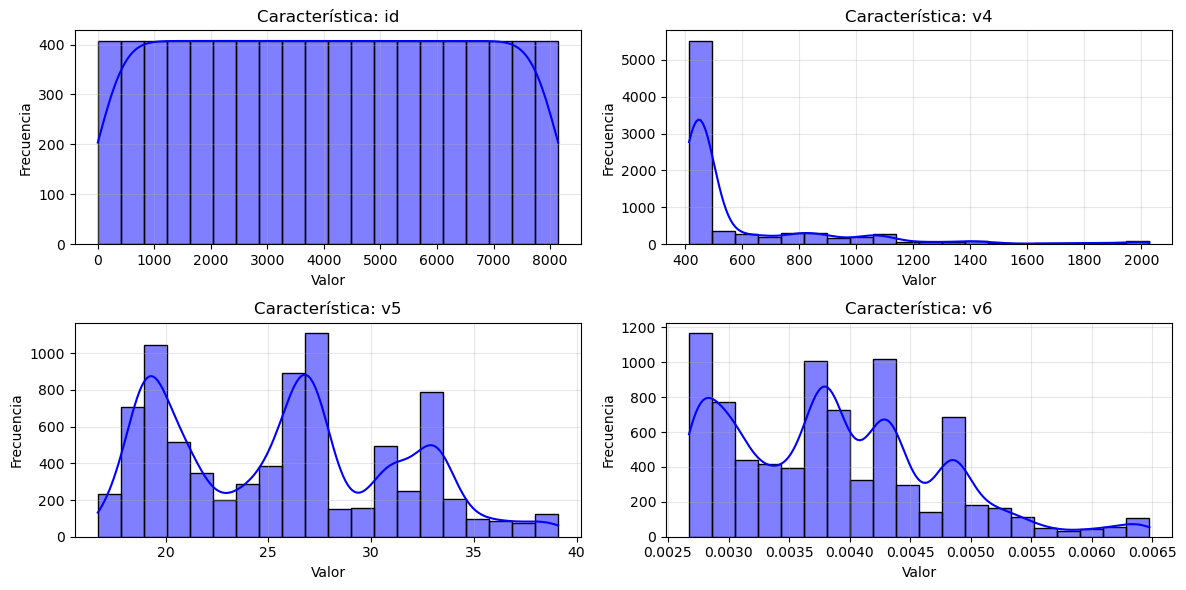

In [15]:
fig, axes = plt.subplots(2, 2,figsize=(12, 6))

axes = axes.flatten()

for i, col in enumerate(df):

    if i < 4:  
        sns.histplot(df[col], bins=20, alpha=0.5, color='blue', edgecolor='black', ax=axes[i], kde=True)
        axes[i].set_title(f'Característica: {col}')        
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Correlación de Pearson entre características

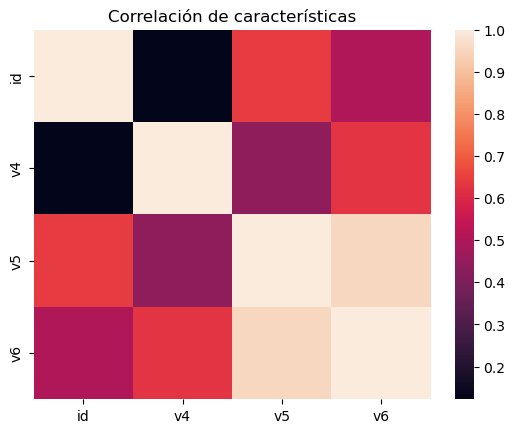

In [16]:
pearsonCorr = df.corr()
sns.heatmap(pearsonCorr)
plt.title("Correlación de características")
plt.show()

In [17]:
pearsonCorr

,id,v4,v5,v6
id,1.000000,0.122284,0.642588,0.504377
v4,0.122284,1.000000,0.438945,0.626556
v5,0.642588,0.438945,1.000000,0.955164
v6,0.504377,0.626556,0.955164,1.000000


## Detección de Outliers

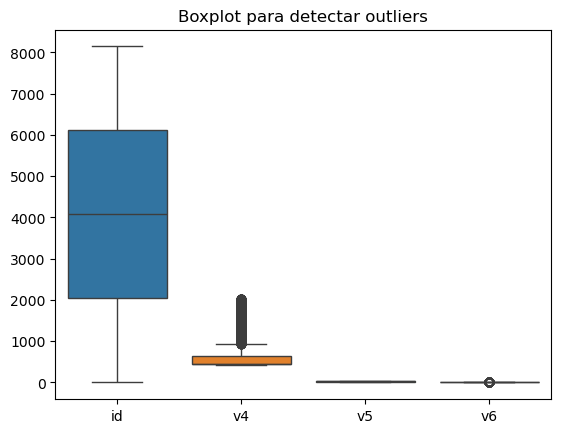

In [18]:
sns.boxplot(df)
plt.title("Boxplot para detectar outliers")
plt.show()

### Calculando el porcentaje de Outliers para la característica v4

In [19]:
def outliersDetection(column):
    quantile1 = df[column].quantile(0.25)
    quantile3 = df[column].quantile(0.75)
    
    iqr = quantile3 - quantile1
    
    upperFence = quantile3 + 1.5 * iqr
    lowerFence = quantile1 - 1.5 * iqr
    
    outliers = df[(df[column] < lowerFence) | (df[column] > upperFence)]
    dfNotOutliers = df[(df[column] >= lowerFence) & (df[column] <= upperFence)]
    return outliers, dfNotOutliers

In [20]:
outliersV4, dfV4 = outliersDetection("v4")

print(f"Número de outliers detectados: {len(outliersV4)}")
print(f"Porcentaje de outliers: {round(len(outliersV4)*100/len(df),2)}")

Número de outliers detectados: 1063
Porcentaje de outliers: 13.05


### Calculando el porcentaje de Outliers para la característica v6

In [21]:
outliersV6, dfV6 = outliersDetection("v6")

print(f"Número de outliers detectados: {len(outliersV6)}")
print(f"Porcentaje de outliers: {round(len(outliersV6)*100/len(df),2)}")

Número de outliers detectados: 118
Porcentaje de outliers: 1.45


## Correlación de Pearson sin outliers

In [22]:
dfV4.corr()

,id,v4,v5,v6
id,1.000000,-0.208109,0.625588,0.497984
v4,-0.208109,1.000000,-0.057462,0.109786
v5,0.625588,-0.057462,1.000000,0.959556
v6,0.497984,0.109786,0.959556,1.000000


In [23]:
dfV6.drop("v4", axis=1).corr()

,id,v5,v6
id,1.000000,0.631223,0.485552
v5,0.631223,1.000000,0.953349
v6,0.485552,0.953349,1.000000


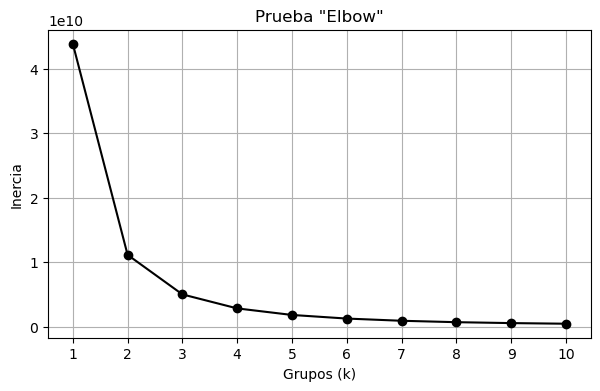

In [24]:
from sklearn.cluster import KMeans

X = dfV6.drop(["v4"], axis=1)

inertia = []
K_range = range(1, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='black')
plt.xlabel('Grupos (k)')
plt.ylabel('Inercia')
plt.title('Prueba "Elbow"')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Entrenamiento de modelo K-means

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Guardando modelo en formato pickle

In [26]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

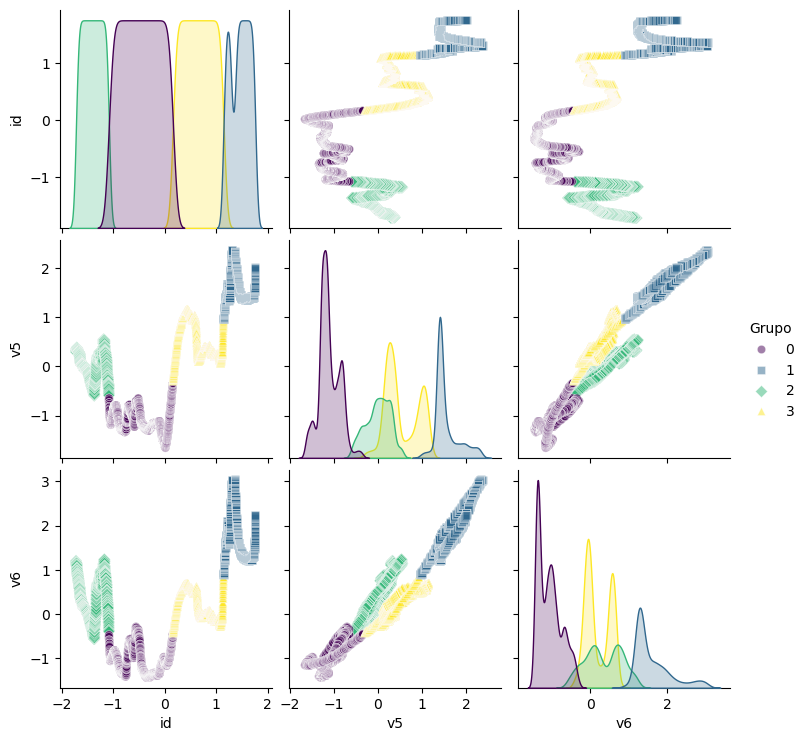

In [27]:
df_scaled = pd.DataFrame(X_scaled, columns=df.columns.drop("v4"))
df_scaled['Grupo'] = labels

sns.pairplot(df_scaled, hue='Grupo', palette='viridis', markers=["o", "s", "D", "^"], plot_kws={'alpha': 0.5})
plt.show()

## Aplicando PCA para visualizar los grupos en 2 dimensiones.

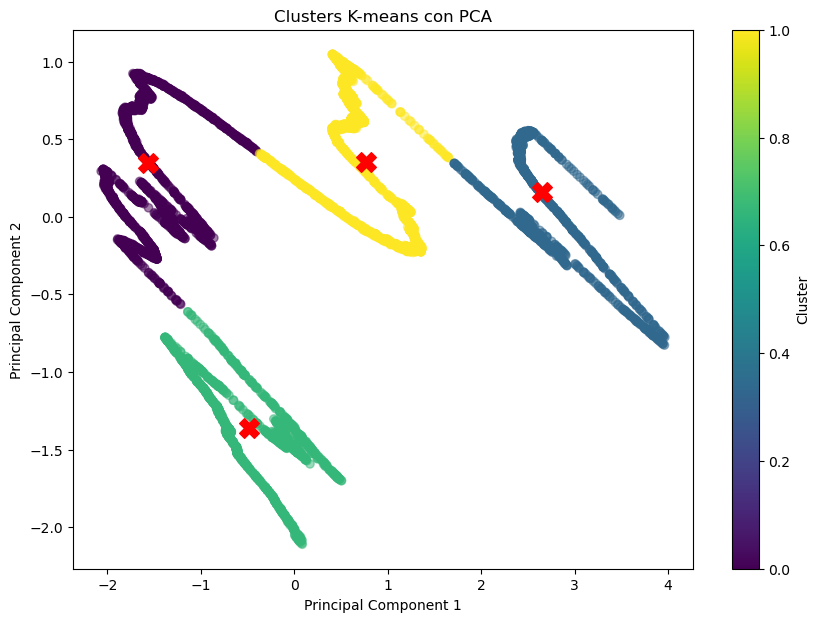

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red')
plt.title('Clusters K-means con PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Evaluación del modelo

In [29]:
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6472938996047284


In [30]:
labels

array([2, 2, 2, ..., 1, 1, 1])

In [31]:
dfV6.loc[:, "Grupos"] = labels
dfV6.head()

C:\Users\Rafa Rincon\AppData\Local\Temp\ipykernel_19728\56064194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfV6.loc[:, "Grupos"] = labels


,id,v4,v5,v6,Grupos
0,1.0,721.2,27.3,0.004793,2
2,2.0,714.0,27.3,0.004783,2
4,3.0,713.5,27.2,0.004779,2
6,4.0,708.2,27.2,0.004772,2
8,5.0,704.5,27.2,0.004757,2


In [32]:
dfV6.tail()

,id,v4,v5,v6,Grupos
16276,8139.0,787.2,36.1,0.005579,1
16278,8140.0,789.5,36.0,0.005563,1
16280,8141.0,798.5,36.1,0.005596,1
16282,8142.0,820.3,36.3,0.005621,1
16284,8143.0,821.0,36.2,0.005612,1


In [33]:
dfV6.to_csv("../data/info_01_agrupado.csv", index=False)